In [2]:
import pandas as pd
import numpy as np
import  math

In [82]:
def utmToLatLng(zone, easting, northing, northernHemisphere=True):
    
    if not northernHemisphere:
        northing = 10000000 - northing

    a = 6378137
    e = 0.081819191
    e1sq = 0.006739497
    k0 = 0.9996

    arc = northing / k0
    mu = arc / (a * (1 - math.pow(e, 2) / 4.0 - 3 * math.pow(e, 4) / 64.0 - 5 * math.pow(e, 6) / 256.0))

    ei = (1 - math.pow((1 - e * e), (1 / 2.0))) / (1 + math.pow((1 - e * e), (1 / 2.0)))

    ca = 3 * ei / 2 - 27 * math.pow(ei, 3) / 32.0

    cb = 21 * math.pow(ei, 2) / 16 - 55 * math.pow(ei, 4) / 32
    cc = 151 * math.pow(ei, 3) / 96
    cd = 1097 * math.pow(ei, 4) / 512
    phi1 = mu + ca * math.sin(2 * mu) + cb * math.sin(4 * mu) + cc * math.sin(6 * mu) + cd * math.sin(8 * mu)

    n0 = a / math.pow((1 - math.pow((e * math.sin(phi1)), 2)), (1 / 2.0))

    r0 = a * (1 - e * e) / math.pow((1 - math.pow((e * math.sin(phi1)), 2)), (3 / 2.0))
    fact1 = n0 * math.tan(phi1) / r0

    _a1 = 500000 - easting
    dd0 = _a1 / (n0 * k0)
    fact2 = dd0 * dd0 / 2

    t0 = math.pow(math.tan(phi1), 2)
    Q0 = e1sq * math.pow(math.cos(phi1), 2)
    fact3 = (5 + 3 * t0 + 10 * Q0 - 4 * Q0 * Q0 - 9 * e1sq) * math.pow(dd0, 4) / 24

    fact4 = (61 + 90 * t0 + 298 * Q0 + 45 * t0 * t0 - 252 * e1sq - 3 * Q0 * Q0) * math.pow(dd0, 6) / 720

    lof1 = _a1 / (n0 * k0)
    lof2 = (1 + 2 * t0 + Q0) * math.pow(dd0, 3) / 6.0
    lof3 = (5 - 2 * Q0 + 28 * t0 - 3 * math.pow(Q0, 2) + 8 * e1sq + 24 * math.pow(t0, 2)) * math.pow(dd0, 5) / 120
    _a2 = (lof1 - lof2 + lof3) / math.cos(phi1)
    _a3 = _a2 * 180 / math.pi

    latitude = 180 * (phi1 - fact1 * (fact2 + fact3 + fact4)) / math.pi

    if not northernHemisphere:
        latitude = -latitude

    longitude = ((zone > 0) and (6 * zone - 183.0) or 3.0) - _a3

    return latitude, longitude
##correcting graphics of the letters. Having different accents and definitions is better if we get all names the same

def posant_accents(it):
    
    if type(it) == str:
        
        ##lletra ç
        
        if '\x87' in it:
            nova = it.replace('\x87','ç')
        else:
            nova = it

        ###lletra i
        if '¡' or 'Ã¯'or 'ï'or 'Ã\xad'or 'í' in nova:
            renova = nova.replace('¡', 'i').replace('Ã¯', 'i').replace('ï', 'i').\
            replace('Ã\xad', 'i').replace('í', 'i')
        else:
            renova = nova
        ###Lletra o
        if '\x95' or 'Ã³' or '¢' or 'ã³'or 'Ã²' or 'ò' in renova:
            trinova = renova.replace('\x95', 'o').replace('Ã³', 'o')\
            .replace('¢', 'o').replace('ã³', 'o').replace('Ã²', 'o').replace('ò', 'o')
        else:
            trinova = renova

        if '¢' in trinova:

            quatrinova = trinova.replace('¢', 'o')
        else:
            quatrinova = trinova

        ###lletra e
        if '\x82' or 'Ã©' or 'é' or 'è'or 'Ãš' or '\x8a' in quatrinova:
            cinquinova = quatrinova.replace('\x82', 'e').replace('Ã©', 'e').replace('é', 'e').replace('è', 'e').\
            replace('Ãš', 'e').replace('\x8a', 'e')
        else:
            cinquinova = quatrinova

        if '\x85' or 'Ã\xa0'in cinquinova:
            sixinova = cinquinova.replace('\x85', 'a').replace('Ã\xa0', 'a').replace('à', 'a')
        else:
            sixinova = cinquinova

        if 'Sarr' in sixinova:

            septinova = 'Sarria'
        else:
            septinova = sixinova

        if 'Ã§' in septinova:
            vuitinova = septinova.replace('Ã§', 'ç')
        else:
            vuitinova = septinova

        ##Lletra u
        if 'ãº' or 'ú' or '£'in vuitinova:
            nounova = vuitinova.replace('ãº', 'u').replace('ú', 'u').replace('£','u')
        else:
            nounova = vuitinova

        if 'ã³' or 'ó' in nounova:

            deunova = nounova.replace('ã³', 'o').replace('ó', 'o')
        else:
            deunova = nounova
    else:
        deunova = it
    
    return deunova

####Causes a angles

def cause_to_angles(it):
    
    if it == 'Alcoholemia':
        it = 'DrunkDriving'
    if it == 'Calçada en mal estat':
        it = 'Road_damaged'
    if it == 'Drogues o medicaments':
        it = 'DUI'
    if it == 'Estat de la senyalitzacio':
        it = 'Signals_damaged'
    if it == 'Exces de velocitat o inadequada':
        it = 'Speeding'
    if it == 'Factors meteorologics':
        it = 'Weather'
    if it == 'Objectes o animals a la calçada':
        it = 'Objects or animals on the road'
    if it == 'No hi ha causa mediata':
        it = 'No mediate cause'

        
    return it

##transalting to catalan

def traduir_castella(word):
    if type(word) == str:
        if word.endswith('ismo'):
            nova = word.replace('ismo', 'isme')
        else:
            nova = word
        if 'ciclo' in nova:
            renova = nova.replace('ciclo', 'cicle')
        else:
            renova = nova
            
        if renova.startswith('Cuadri'):
            trinova = renova.replace('Cuadri', 'Quadri')
        else:
            trinova = renova
        
        if trinova.startswith('Camion'):
            
            quatrinova = trinova.replace('Camion', 'Camio rigid')
        
        else:
            quatrinova = trinova
            
        if quatrinova.endswith('  camion'):
            
            cinquinova = quatrinova.replace('camion', 'camio')
        else:
            cinquinova = quatrinova
            
        if 'Tm'in cinquinova:
            sixinova = cinquinova.replace('Tm', 'tones')
        else:
            sixinova = cinquinova
        if '75cc' in sixinova:
            septinova = sixinova.replace('75cc', ' 75 cc')
        else:
            septinova = sixinova
        if '> 75' in septinova:
            octinova = septinova.replace('> 75', '>= 75')
        else:
            octinova = septinova
        if octinova == 'Tranvia o tren':
            noninova = 'Tren o tramvia'
        else:
            noninova = octinova
        if 'de obras' in noninova:
            nova2 = noninova.replace('de obras', "d'obres i serveis")
        else:
            nova2 = noninova
        
        if 'Otros' or 'terreno' or 'articulado' or 'vehic. a' or 'Todo' or '17 plazas' in nova2:
            
            nova3 = nova2.replace('Otros', 'Altres').replace('terreno', 'terreny').\
            replace('articulado', 'articulat').replace('vehic. a', 'vehicles amb').replace('Todo', 'Tot')\
            .replace('17 plazas',' 17')
        else:
            nova3 = nova2
        if nova3 == 'Tractocamion':
            nova4 = "Tractor camio"
        else:
            nova4 = nova3
    else:
        nova4 = word
    
    return nova4

def ped_to_angles(it):
    if it == 'Desconegut':
        it = 'unknown'
    if it == 'Creuar per fora pas de vianants':
        it = 'Crossing outside ped crossing'
    if it == 'Desobeir el senyal del semafor':
        it = 'Disobey the traffic light signal'
    if it == 'Transitar a peu per la calçada':
        it = 'Cross through the road'
    if it == 'Altres':
        it = 'Other'
    if it == 'Desobeir altres senyals':
        it = 'Disobey other signals'
    if it == 'No es causa del  vianant':
        it = 'No peds fault'

        
    return it


def setmana_a_angles(it):
    if it == 'Dilluns':
        it = 'Monday'
    if it == 'Dimarts':
        it = 'Tuesday'
    if it == 'Dimecres':
        it = 'Wednesday'
    if it == 'Dijous':
        it = 'Thursday'
    if it == 'Divendres':
        it = 'Friday'
    if it == 'Dissabte':
        it = 'Saturday'
    if it == 'Diumenge':
        it = 'Sunday'
        
    return it


def mes_a_angles(it):
    if it == 'Gener':
        it = 'January'
    if it == 'Febrer':
        it = 'February'
    if it == 'Març':
        it = 'March'
    if it == 'Abril':
        it = 'April'
    if it == 'Maig':
        it = 'May'
    if it == 'Juny':
        it = 'June'
    if it == 'Juliol':
        it = 'July'
    if it == 'Agost':
        it = 'August'
    if it == 'Setembre':
        it = 'September'
    if it == 'Octubre':
        it = 'October'
    if it == 'Novembre':
        it = 'November'
    if it == 'Desembre':
        it = 'December'
        
    return it

def counting_non_zeros(tup):
    count = 0
    for i in tup:
        if i > 0:
            count+=1
    if count == 0:
        count = 1
    return count

def debugging_strings(row, word):
    word = str(word)
    count = 0
    for i in row:
        if word in i:
            count =1
    return count

def mercedes(word):
    """Corregir tots els mercedes"""
    if word in ['mercedes-benz', 'mercedesb', 'mecedes']:
        word = 'mercedes'
    return word


def licenses(license):
    
    if 'A' in license:
        license = 'motorbike_license'
    elif 'BTP' in license:
        license = 'taxis_ambulances_license'
    elif 'B' in license:
        
        license = 'regular_license'
    elif 'D' in license:
        license = 'bus_license'
    elif 'C' in license:
        license = 'van_license'

    return license        

def fixing_codes(i):
   
    if i in desconegut_llista:
        i = int(-1)
    elif type(i) == float:
        i = int(i)
        
    elif (type(i) == str) and len(i) > 4:
        i = int(''.join(i.split("-", 2)[2:]))
    elif (type(i) == str) and len(i) <= 4:
        i = int(''.join(i.split('.')[0]))

    else:
        i = int(i)
    return i

In [97]:
###ACCIDENTS
accidents = {}

anys = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

for an in anys:
    if int(an) < 2015:
        encoding = 'ISO-8859-15'
    else:
        encoding = 'utf-8'
    
    file = '/Users/fcbnyc/dsi/databases/BarcelonaAccidents/{}-files/{}_accidents_accidents_gu_bcn_{}.csv'.format(an, an, an)
    accidents[an] = pd.read_csv(file, encoding=encoding)
for key in accidents.keys():
    if len(accidents[key].columns) == 25:
        accidents[key].columns = ['incident_#', 'district_code', 'district', 'neighborhood_code', 'neighborhood',\
                                   'street_code', 'street', 'zip_code', 'weekday_name', 'weekday','type_of_day', 'year',\
                                    'month','month_name', 'day_month','hour_day', 'shift','pedestrian_cause','#_deaths',\
                                   'minor_injuries', 'severe_injuries','amount_victims','amount_vehicles_involved','point_y', 'point_x']
        
    else:
        accidents[key].columns = ['incident_#', 'district_code', 'district', 'neighborhood_code', 'neighborhood',\
                                   'street_code', 'street', 'zip_code', 'weekday_name', 'weekday','type_of_day', 'year',\
                                    'month','month_name', 'day_month','hour_day', 'shift','pedestrian_cause','#_deaths',\
                                    'minor_injuries', 'severe_injuries','amount_victims','amount_vehicles_involved','point_x', 'point_y',\
                                   'long', 'lat']
    accidents[key]['point_x'] = [float(x.replace(',', '.')) if type(x) == str else x for x in accidents[key]['point_x']]
    accidents[key]['point_y'] = [float(x.replace(',', '.')) if type(x) == str else x for x in accidents[key]['point_y']]
    accidents[key]['longitude'] = [b for a,b in accidents[key][['point_x', 'point_y']].apply(lambda row: utmToLatLng(31, row['point_x'], row['point_y']), axis=1)]
    accidents[key]['latitude'] = [a for a,b in accidents[key][['point_x', 'point_y']].apply(lambda row: utmToLatLng(31, row['point_x'], row['point_y']), axis=1)]


dataframe = pd.DataFrame()
prova = 0

for key in accidents.keys():
    prova = prova + len(accidents[key])
    
    dataframe = pd.concat([dataframe, accidents[key]])



dataframe = dataframe[dataframe['#_deaths'].notnull()]
dataframe.reset_index(inplace=True)
##Erasing type of day because all days are laboral
dataframe.drop(['month', 'weekday', 'type_of_day', 'point_x', 'point_y', 'lat', 'long'], axis=1, inplace=True)
dataframe = dataframe[~dataframe['incident_#'].duplicated(keep='last')]
dataframe['neighborhood'] = dataframe['neighborhood'].apply(lambda x: posant_accents(x)).replace('el Poble-sec', 'el Poble Sec')
desconegut_llista = dataframe[dataframe['neighborhood'] == 'Desconegut']['neighborhood_code'].unique()
dataframe['neighborhood_code'] = dataframe['neighborhood_code'].apply(lambda x: fixing_codes(x))
dataframe['pedestrian_cause'] = dataframe['pedestrian_cause'].apply(lambda x: posant_accents(x)).apply(lambda x: ped_to_angles(x))
dataframe['street'] = dataframe['street'].apply(lambda x: posant_accents(x))
dataframe['shift'] = ['morning' if x == 'Matí' else 'afternoon/evening' if x == 'Tarda' else 'night' if x == 'Nit' else 'watchout' for x in dataframe['shift']]
dataframe['month_name'] = dataframe['month_name'].apply(lambda x: mes_a_angles(x))
dataframe['weekday_name'] = dataframe['weekday_name'].apply(lambda x: setmana_a_angles(x))
dataframe['incident_#'] = dataframe['incident_#'].str.strip()
dataframe.to_csv('accidents_amb_2018.csv')
accidents = dataframe.copy()

print("Accidents Done")

###CAUSES

causes = {}

anys = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

for an in anys:
    if int(an) < 2015:
        encoding = 'ISO-8859-15'
    else:
        encoding = 'utf-8'
    
    file = '/Users/fcbnyc/dsi/databases/BarcelonaAccidents/{}-files/{}_accidents_causes_gu_bcn_{}.csv'.format(an, an, an)
    if int(an) == 2017:
        causes[an] = pd.read_csv(file, usecols=[0,18],encoding=encoding)
    else:
        causes[an] = pd.read_csv(file, usecols=[0,17],encoding=encoding)

dataframe = pd.DataFrame()
prova = 0

for key in causes.keys():
    prova = prova + len(causes[key])
    causes[key].columns = ['incident_#', 'cause']
    
    dataframe = pd.concat([dataframe, causes[key]])

dataframe['cause'] = dataframe['cause'].apply(lambda x: posant_accents(x)).apply(lambda x: cause_to_angles(x))
dataframe['cause'].fillna('non_existing', inplace=True)
dataframe = dataframe.groupby('incident_#').cause.agg(['count', ('cause', ','.join)]).reset_index()
dataframe.rename(columns={'count':'cause_count'}, inplace=True)
dataframe['incident_#'] = dataframe['incident_#'].str.strip()

cause_1 = []

max_count = max(dataframe['cause_count'])
for a,b in zip(dataframe['cause_count'], dataframe['cause']):
    stripped_list = b.split(',')
    added_list = ['non_existing'] * (max_count- a)
    stripped_list.extend(added_list)
    cause_1.append(stripped_list)
dataframe = pd.concat([dataframe, pd.DataFrame(cause_1, columns=['cause_1', 'cause_2', 'cause_3'])], axis=1)
dataframe.drop('cause', axis=1, inplace=True)
dataframe.to_csv('causes_amb_2018.csv')
causes = dataframe.copy()
total = pd.merge(accidents,causes, on='incident_#', how='left')
total['cause_count'].fillna(0,inplace=True)
for col in ['cause_1', 'cause_2', 'cause_3']:
    total[col].fillna('unknown', inplace=True)
causes_col_index = [total.columns.get_loc(x) for x in total.columns if x.startswith('cause') and not(x.endswith('count'))]
cause_col_names  = [x for x in total.columns if x.startswith('cause') and not(x.endswith('count'))]
causes_unique = []
for col in cause_col_names:
    for i in total[col].unique():
        causes_unique.append(i)
        
causes_unique = set(causes_unique)
for x in causes_unique:
    #column_name = '_is' + x
    total['is_cause_' + x] = [1 if x in row[causes_col_index[0]+1:causes_col_index[-1]+2]else 0 for row in total.itertuples()]

print("Causes Done")
##PeOPLe
people = {}

for an in anys:
    file = '/Users/fcbnyc/dsi/databases/BarcelonaAccidents/{}-files/{}_accidents_persones_gu_bcn_{}.csv'.format(an, an, an)
    if int(an) < 2014:
        encoding = 'ISO-8859-15'
        pont = pd.read_csv(file,encoding=encoding)
        columnes = []
        columnes.append(pont.columns[0])
        columnes.extend(pont.columns[18:22])
        people[an] = pont[columnes]
        
    elif int(an) == 2014:
        encoding = 'ISO-8859-15'
        pont = pd.read_csv(file,encoding = encoding)
        columnes = []
        columnes.append(pont.columns[0])
        columnes.extend(pont.columns[17:21])
        people[an] = pont[columnes]
        
    elif an == '2015':
        encoding = 'ISO-8859-15'
        pont = pd.read_csv(file,encoding = encoding)
        columnes = []
        columnes.append(pont.columns[0])
        columnes.extend(pont.columns[17:21])
        people[an] = pont[columnes]
        
    else:
        encoding = 'utf-8'
        pont = pd.read_csv(file, encoding = encoding)
        columnes = []
        columnes.append(pont.columns[0])
        columnes.extend(pont.columns[18:22])
        people[an] = pont[columnes]
    
    
dataframe = pd.DataFrame()
prova = 0

for key in people.keys():
    prova = prova + len(people[key])
    if int(key) < 2016:
        
        people[key].columns = ['incident_#', 'vehicle', 'gender', 'role_people', 'age']
    
    else:
        
        people[key].columns = ['incident_#', 'vehicle', 'gender', 'age', 'role_people']
    dataframe = pd.concat([dataframe, people[key]])

dataframe['gender'] = ['male' if x =='Home' else 'female' if x == 'Dona' else 'unknown' for x in dataframe['gender']]
dataframe['role_people'] = ['driver' if x =='Conductor' else 'passenger' if x == 'Passatger' else 'pedestrian' for x in dataframe['role_people']]
dataframe['vehicle'] = dataframe['vehicle'].apply(lambda x: posant_accents(x)).apply(lambda x: traduir_castella(x))
dataframe['vehicle'] = ['Motorbike' if x == 'Motocicleta' else\
 'Car' if x in ['Turisme', 'Autocaravana', 'Tot terreny'] else \
 'Moped' if x == "Ciclomotor" else \
 'Bicycle' if x == 'Bicicleta' else\
 'Bus' if x in ['Autobus', 'Autobus articulat', 'Autocar', 'Microbus <= 17'] else\
 'Van' if x == 'Furgoneta' else\
 'Truck' if x in ['Camio rigid <= 3,5 tones', 'Camio rigid > 3,5 tones', 'Tractor camio'] else 'Other vehicles' for x in dataframe['vehicle']]

dataframe = dataframe.groupby('incident_#').agg(['count',('second', ','.join)]).reset_index()
dataframe.columns = ['incident_#','people_count', 'age', 'a', 'gender', 'b', 'role_people',
                'c', 'vehicle']
dataframe.drop(['a', 'b', 'c'], axis=1,inplace=True)
dataframe['incident_#'] = dataframe['incident_#'].str.strip()
for col in dataframe.columns[2:]:   
    people_1 = []

    max_count = max(dataframe['people_count'])
    for a,b in zip(dataframe['people_count'], dataframe[col]):
        stripped_list = str(b).split(',')
        stripped_list.extend(['non_existing'] * (max_count- a))
        people_1.append(stripped_list)
    #print(col)
    dataframe = pd.concat([dataframe, pd.DataFrame(people_1, columns=[col +'_' +str(x) for x in range(1,max_count + 1)])], axis=1)
    dataframe.drop(col,axis=1,inplace=True)

dataframe.to_csv('people_amb_2018.csv')
        
people = dataframe.copy()

total = pd.merge(total,people, on='incident_#', how='left')
for col in [x for x in total.columns if x.startswith('people') and not(x.endswith('count'))]:
    total[col].fillna('non_existing', inplace=True)
for col in [x for x in total.columns if (x.startswith('role')) or (x.startswith('gender')) or (x.startswith('vehicle_'))]:
    total[col].fillna('non_existing', inplace=True)
    total[col] = [str(x).replace('0', 'non_existing') for x in total[col]]
    total[col] = [str(x).replace('0','non_existing').replace('0','Desconegut') for x in total[col]]
for col in total.columns:
    total[col].fillna('0',inplace=True)
    
vehicle_col_names = [x for x in total.columns if x.startswith('vehicle_')]
llista_vehicles = []
for col in vehicle_col_names:
    for i in total[col].unique():
        if i not in llista_vehicles:
            llista_vehicles.append(i)
total['is_vehicle_unknown'] =[1 if x in ['non_existing', 'unknown'] else 0 for x in total['vehicle_1']]
llista_vehicles.remove('non_existing')

for i in llista_vehicles:
    total['is_vehicle_' + i] = [debugging_strings(row[1:],i) for row in total[vehicle_col_names].itertuples()]

roles_col_names = [x for x in total.columns if 'role' in x]
for role in total['role_people_1'].unique():
    total['is_role_' + role] = [debugging_strings(row[1:], role) for row in total[roles_col_names].itertuples()]
        
age_col_names = [x for x in total.columns if x.startswith('age_')]
age_col_index = [total.columns.get_loc(x) for x in total.columns if x.startswith('age_')]

for col in age_col_names:
    total[col] = [str(x).replace('non_existing', '0').replace('Desconegut', '0') for x in total[col]]
    total[col] = total[col].astype(int)

total['age_avg'] = [sum(row[age_col_index[0] +1:age_col_index[-1] + 2])/counting_non_zeros(row[age_col_index[0] +1:age_col_index[-1] + 2])\
                    for row in total.itertuples()]
age_role_col_names = [x for x in total.columns if ('age_' in x )or ('role_' in x)]
gender_role_col_index = [total.columns.get_loc(x) for x in total.columns if ('age_' in x )or ('role_' in x)]
age_driver = []
is_young_driver = []
for row in total[age_role_col_names].itertuples():
    age = 0
    count = 0
    young = 0
    for x in range(0,len(row)):
        if row[x] == 'driver':
            count=count + 1
            age = age + row[x-21]
            if row[x-21] <25:
                young = young + 1
    if count == 0:
        age_driver.append(count)
    else:
        age_driver.append(age/count)
    if young >0:
        is_young_driver.append(young)
    else:
        is_young_driver.append(young) 

total['age_driver'] = age_driver
total['is_young_driver'] = is_young_driver

gender_role_col_names = [x for x in total.columns if ('gender_' in x )or ('role_' in x)]
 
gender_role_col_index = [total.columns.get_loc(x) for x in total.columns if ('age_' in x )or ('role_' in x)]
is_female_driver = []
is_male_driver = []
for row in total[gender_role_col_names].itertuples():
    is_male = 0
    is_female = 0
    count = 0
    for x in range(0,len(row)):
        if row[x] == 'driver':
            if row[x-21] == 'male':
                is_male +=1
            if row[x-21] == 'female':
                is_female +=1
            

    is_male_driver.append(is_male)
    is_female_driver.append(is_female)

            
total['is_male_driver'] = is_male_driver
total['is_female_driver'] = is_female_driver

print("People Done")

##TYPES

types = {}

anys = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

for an in anys:
    if int(an) < 2016:
        encoding = 'ISO-8859-15'
    else:
        encoding = 'utf-8'
    
    file = '/Users/fcbnyc/dsi/databases/BarcelonaAccidents/{}-files/{}_accidents_tipus_gu_bcn_{}.csv'.format(an, an, an)
        
    types[an] = pd.read_csv(file, usecols=[0,17],encoding=encoding)
    

dataframe = pd.DataFrame()
prova = 0

for key in types.keys():
    prova = prova + len(types[key])
    types[key].columns = ['incident_#', 'accident_type']
    
    dataframe = pd.concat([dataframe, types[key]])
    
dataframe['accident_type'] = dataframe['accident_type'].apply(lambda x: posant_accents(x)).map({'Atropellament': 'run_over',
                                                              'Col.lisio lateral': 'lateral_collision',
                                                              'Xoc contra element estatic': 'crash_into_stationary',
                                                              'Abast': 'rear-end_collision',
                                                               'Col.lisio frontal':'frontal_collision',
                                                              'Col.lisio fronto-lateral':'frontal-lateral_collision',
                                                              'Caiguda (dues rodes)':'fall--motorcycle',
                                                              'Abast multiple':'multiple_rear-end_collision',
                                                              'Caiguda interior vehicle':'fall_inside_vehicle',
                                                              'Altres':'Other_types',
                                                              'Bolcada (mes de dues rodes)':'overturning',
                                                              'Desconegut':'unknown',
                                                              'Sortida de via amb xoc o col.lisio':'run-off_with_crash_or_collision',
                                                              'Encalç':'rear-end_collision',
                                                              'Sortida de via amb bolcada':'run-off_with_overturning',
                                                              'Xoc amb animal a la calçada':'crash_into_animal_on_road',
                                                              'Resta sortides de via':'run-off_not_included_previously'})

dataframe = dataframe.groupby('incident_#').agg(['count',('type_count', ','.join)]).reset_index()

dataframe.columns = ['incident_#', 'type_count', 'accident_type']
dataframe['incident_#'] = dataframe['incident_#'].str.strip()

for col in dataframe.columns[2:]:   
    people_1 = []

    max_count = max(dataframe['type_count'])
    for a,b in zip(dataframe['type_count'], dataframe[col]):
        stripped_list = str(b).split(',')
        stripped_list.extend([0] * (max_count- a))
        people_1.append(stripped_list)
    #print(col)
    dataframe = pd.concat([dataframe, pd.DataFrame(people_1, columns=[col + '_'+ str(x) for x in range(1,max_count + 1)])], axis=1)
    dataframe.drop(col,axis=1,inplace=True)

dataframe.to_csv('types_amb_2018.csv')
types = dataframe.copy()
total = pd.merge(total,types, on='incident_#', how='left')
type_col_index = [total.columns.get_loc(x) for x in total.columns if 'type' in x]
type_col_names  = [x for x in total.columns if 'type' in x]
total['type_count'].fillna(0,inplace=True)
total['accident_type_1'].fillna('unknown',inplace=True)
total['accident_type_1'] = [str(x).replace('0', 'unknown') for x in total['accident_type_1']]
for col in type_col_names[2:]:
    total[col] = [str(x).replace('0', 'non_existing').replace('nan', 'non_existing') for x in total[col]]
    total[col].fillna('non_existing',inplace=True)
                                
                            
total.fillna('non_existing',inplace=True)

for i in total['accident_type_1'].value_counts().index:
    if total['accident_type_1'].value_counts()[i] > 200:
        total['is_type_' + i] = [debugging_strings(row[2:5],i) for row in total[type_col_names].itertuples()]

print("Types Done")

###VEHICLES

vehicles = {}

anys = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

for an in anys:
    if int(an) < 2016:
        encoding = 'ISO-8859-15'
    else:
        encoding = 'utf-8'
    
    file = '/Users/fcbnyc/dsi/databases/BarcelonaAccidents/{}-files/{}_accidents_vehicles_gu_bcn_{}.csv'.format(an, an, an)
        
    if an != '2018':
        pont = pd.read_csv(file, encoding=encoding)
        columnes = []
        columnes.append(pont.columns[0])
        columnes.extend(pont.columns[18:23])
        vehicles[an] = pont[columnes]
    else:
        pont = pd.read_csv(file, encoding=encoding)
        columnes = []
        columnes.append(pont.columns[0])
        columnes.extend(pont.columns[19:24])
        vehicles[an] = pont[columnes]
    

dataframe = pd.DataFrame()
prova = 0

for key in vehicles.keys():
    prova = prova + len(vehicles[key])
    vehicles[key].columns = ['incident_#', 'vehicle_model', 'vehicle_brand', "vehicle_color", 'license_class', 'senority_license']
    
    dataframe = pd.concat([dataframe, vehicles[key]])
dataframe['vehicle_color'] = dataframe['vehicle_color'].apply(lambda x: posant_accents(x)).map({'Negre': 'black',
                                                              'Blanc': 'white', 'Altres':'others', 'Gris': 'gray',
                                                              'Vermell': 'red', 'Blau':'blue','Verd': 'green',
                                                              'Platejat': 'silver','Groc': 'yellow','Beige':'beige',
                                                              'Marro':'brown','Taronja':'orange','Daurat':'gold',
                                                              'Violeta':'purple','Rosa':'pink', 'Negre/Groc':'black/yellow',
                                                              'granate':'maroon'})
dataframe['vehicle_color'].fillna('unknown',inplace=True)
dataframe['vehicle_model'].fillna('unknown',inplace=True)
dataframe = dataframe[dataframe['incident_#'].notnull()]
dataframe['senority_license'] = dataframe['senority_license'].replace('Desconegut', '0')
dataframe['license_class'].replace(['Desconegut', 'Es desconeix'], 'unknown',inplace=True)
dataframe['vehicle_model'].replace('Desconegut', 'unknown',inplace=True)
dataframe['vehicle_brand'].replace('Desconegut', 'unknown',inplace=True)
dataframe = dataframe.groupby('incident_#').agg(['count',('vehicle_count', ','.join)]).reset_index()
dataframe.columns = ['incident_#', 'vehicle_count', 'vehicle_model', 'a',
                    'vehicle_brand', 'b', 'vehicle_color', 'c', 'license_class', 'd', 'senority_license']
dataframe.drop(['a','b','c', 'd'], axis=1, inplace=True)
dataframe['incident_#'] = dataframe['incident_#'].str.strip()
dataframe['vehicle_model'] = [s.replace(',', '') for s in dataframe['vehicle_model']]
for col in dataframe.columns[2:]:   
    people_1 = []

    max_count = max(dataframe['vehicle_count'])
    for a,b in zip(dataframe['vehicle_count'], dataframe[col]):
        stripped_list = str(b).split(',')
        stripped_list.extend([0] * (max_count- a))
        people_1.append(stripped_list)
        #print(len(stripped_list))
    #print(col)
    dataframe = pd.concat([dataframe, pd.DataFrame(people_1, columns=[col +'_' +str(x) for x in range(1,max_count + 1)])], axis=1)
    dataframe.drop(col,axis=1,inplace=True)
    
dataframe.to_csv('vehicles_amb_2018.csv')

vehicles = dataframe.copy()
total = pd.merge(total,vehicles, on='incident_#', how='left')
for col in [x for x in total.columns if (x.startswith('vehicle_brand')) or (x.startswith('vehicle_color'))]:
    total[col] = total[col].str.replace('0', 'non_existing')
    total[col] = [str(x).lower().strip().replace('.','').replace(' ', '') for x in total[col]]
    total[col].fillna('non_existing',inplace=True)
for col in total.columns:
    total[col].fillna(0,inplace=True)
##not using model because has too many unique values
vehicle_brand_col_names = [x for x in total.columns if x.startswith('vehicle_brand_')]
for col in vehicle_brand_col_names:
    total[col] = total[col].apply(lambda x: mercedes(x))
    total[col] = total[col].str.replace('nan', 'non_existing')
for x in total['vehicle_brand_1'].value_counts()[0:20].index:
    total['is_vehicle_brand_' + x] = [debugging_strings(row[1:],x) for row in total[vehicle_brand_col_names].itertuples()]
vehicle_color_col_names = [x for x in total.columns if x.startswith('vehicle_color_')]
for col in vehicle_color_col_names:
    total[col] = total[col].str.replace('nan','unknown')
for x in total['vehicle_color_1'].value_counts().index:
    total['is_vehicle_color_' + x] = [debugging_strings(row[1:],x) for row in total[vehicle_color_col_names].itertuples()]

vehicle_license_col_names = [x for x in total.columns if x.startswith('license_class')]
for col in vehicle_license_col_names:
    total[col] = total[col].apply(lambda x: posant_accents(x))
    total[col] =total[col].str.replace('0', 'non-existing').replace('Sense permis','no_license').\
    replace('Llicencia', 'moped_permit').replace('AM', 'moped_permit')
    total[col].fillna('non-existing',inplace=True)
    total[col] = total[col].apply(lambda x: licenses(x))
    
for i in total['license_class_1'].unique():
    total['is_license_class_' + i] = [debugging_strings(row[1:],i) for row in total[vehicle_license_col_names].itertuples()]

senority_col_names = [x for x in total.columns if x.startswith('senority_')]
for col in senority_col_names:
    total[col] = [str(x).replace('non_existing', '0').replace('Desconegut', '0') for x in total[col]]
    total[col] = total[col].astype(int)

total['senority_avg'] = [sum(row[1:])/counting_non_zeros(row[1:])\
                    for row in total[senority_col_names].itertuples()]
total.to_csv('total_accidents_2018.csv', encoding='utf-8')    

print('DONE')

# print(total.isnull().sum().sum())
# total.to_csv('total_accidents_2018.csv', encoding='utf-8')
##Stripping all values
# total_obj = total.select_dtypes(['object'])
# total[total_obj.columns] = total_obj.apply(lambda x: x.str.strip())
##Next step is to create a column for cause, people, types and vehicles
##creating columns for:
# Number of each gender
#mean age of driversDONE
#gender of driversDONE



Accidents Done
Causes Done
People Done
Types Done
DONE


In [109]:
prova = accidents[['latitude', 'longitude']].copy()

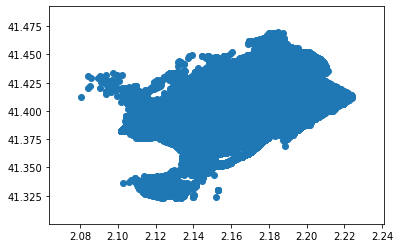

In [110]:
prova = prova[prova['longitude'] > 0]
plt.scatter(prova['longitude'], prova['latitude'])

In [76]:
total.to_csv('total_accidents_2018.csv', encoding='utf-8')

In [420]:
aa = pd.read_csv('total_accidents_2018.csv', encoding='utf-8')
aa.isnull().sum().sum()

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0

In [112]:
total.columns[10:20]

Index(['long', 'longitude', 'minor_injuries', 'month_name', 'neighborhood',
       'neighborhood_code', 'pedestrian_cause', 'severe_injuries', 'shift',
       'street'],
      dtype='object')

In [106]:

deaths[['incident_#','#_deaths','latitude', 'longitude','point_x', 'point_y','weekday_name', 'year', 'month_name','hour_day']]\
.to_csv('glik_file.csv',encoding='utf-8')





KeyError: "['point_x' 'point_y'] not in index"

In [413]:
no_license_col_names = [x for x in aa.columns if x.startswith('no_license')]
no_license_col_names

[]

In [100]:
count = 0
for i,j in zip(total['street'], total['street_code']):
    count +=1
    if ('Meridiana' in i) and (count<100):
        print(j)

209900.0
209900.0
209900.0
209900.0
209900.0
209900.0


In [103]:
total[total['#_deaths'] > 0]['street'].value_counts()[0:10]

Diagonal               9
Corts Catalanes        6
Meridiana              6
General Mitre          5
Litoral (Llobregat)    5
Maragall               4
Litoral (Besos)        3
Diputacio              3
Dalt (Besos)           3
Concepcion Arenal      3
Name: street, dtype: int64

In [105]:
total[(total['street'] == 'Diagonal')]['street_code'].unique()

array([144601.])